1- Which tests by mouse vs. direct touch (- heatmap : color code the performance, green is the trackpad & red for direct touch)
2- Histogram for small medium large  (x: position, y: time)
3- Model our data on fitt's law
4- Model Error rate same metel tahet bas error mahal time bel y
5- Histogram AB testing over 27 tests (x: tests, y: time) this is to compare time if users were more comfortable in A or B (Learning curve)
6- plot data based on average time (histogram) based on the different methods and the average time it took to complete the tasks
7- based on the distance chou eemil direct touch or mouse (the further it is ha enstaamil mouse)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Fontconfig warning: ignoring UTF-8: not a valid region tag


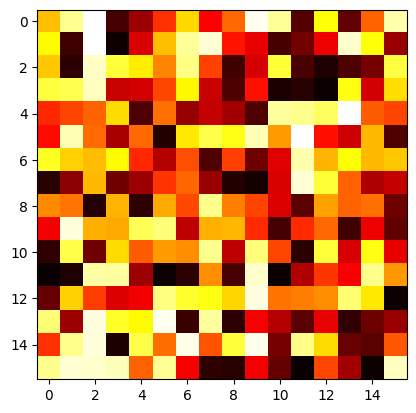

In [4]:
# x axis : position
# y: size S M L

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [22]:
yara = pd.read_csv("Yara_A.csv")
mouad = pd.read_csv("Mouad_A.csv")

# start loop
    

pd.merge(yara, mouad, on="test_nb", how="left", suffixes=("_yara", "_mouad")).drop_duplicates()

,test_nb,time_yara,error_nb_yara,method_yara,W_yara,D_yara,Fitts_yara,time_mouad,error_nb_mouad,method_mouad,W_mouad,D_mouad,Fitts_mouad
0,6,10.151,0,Direct touch,25,21.166010,0.884903,0.878,0,Direct touch,25,21.166010,0.884903
1,21,3.039,0,Mouse,60,21.587033,0.443377,2.900,0,Mouse,60,21.587033,0.443377
2,10,3.862,0,Mouse,40,12.328828,0.387606,1.801,0,Mouse,40,12.328828,0.387606
3,16,1.020,0,Direct touch,40,22.181073,0.636476,3.701,0,Direct touch,40,22.181073,0.636476
4,1,2.912,0,Mouse,25,12.449900,0.583034,4.090,0,Mouse,25,12.449900,0.583034
5,5,2.814,0,Direct touch,25,12.961481,0.602608,0.743,0,Direct touch,25,12.961481,0.602608
6,7,3.330,0,Mouse,25,22.181073,0.916280,1.327,0,Mouse,25,22.181073,0.916280
7,13,1.860,0,Mouse,40,19.949937,0.583758,0.960,0,Mouse,40,19.949937,0.583758
8,25,1.994,0,Mouse,60,21.931712,0.449459,1.228,0,Mouse,60,21.931712,0.449459
9,12,2.132,0,Mouse,40,21.307276,0.616058,1.732,0,Mouse,40,21.307276,0.616058


In [27]:
import os


dir_list = os.listdir()

# print the list
print(dir_list)

['Maria_B.csv', 'Maria_A.csv', '.DS_Store', 'Mouad_A.csv', 'Mouad_B.csv', 'Zainab_A.csv', 'Zainab_B.csv', '.ipynb_checkpoints', 'Yara_A.csv', 'analysis.ipynb', 'Yara_B.csv']


In [34]:
import re

for i in dir_list:
    print(i)
    x = re.search("^[a-zA-Z0-9]*_A.csv$", i)
    if x:
        print("YES")
    else:
        print("NO")

Maria_B.csv
NO
Maria_A.csv
YES
.DS_Store
NO
Mouad_A.csv
YES
Mouad_B.csv
NO
Zainab_A.csv
YES
Zainab_B.csv
NO
.ipynb_checkpoints
NO
Yara_A.csv
YES
analysis.ipynb
NO
Yara_B.csv
NO


In [105]:
first = True
keep_same = {'test_nb'}
for file in dir_list:
    x = re.search("^[a-zA-Z0-9]*_A.csv$", file)
    if x:
        new_csv = pd.read_csv(file).drop(columns=['W', 'D', 'Fitts'])
        temp_str = "_" + file.split("_")[0]
        new_csv.columns = ['{}{}'.format(c, '' if c in keep_same else temp_str ) for c in new_csv.columns]
        if first:
            df = new_csv
            first = False
        else:
            df = pd.merge(df, new_csv, on="test_nb", suffixes = (None, temp_str))
               

In [107]:
df.sort_values(by="test_nb")

,test_nb,time_Maria,error_nb_Maria,method_Maria,time_Mouad,error_nb_Mouad,method_Mouad,time_Zainab,error_nb_Zainab,method_Zainab,time_Yara,error_nb_Yara,method_Yara
4,1,3.850,0,Mouse,4.090,0,Mouse,3.824,0,Mouse,2.912,0,Mouse
1,2,3.719,0,Mouse,0.745,0,Direct touch,3.131,0,Direct touch,2.369,0,Direct touch
24,3,2.621,0,Mouse,2.385,0,Mouse,2.608,0,Mouse,2.183,0,Mouse
18,4,2.486,0,Mouse,0.998,0,Direct touch,1.256,0,Direct touch,1.832,0,Mouse
5,5,4.110,0,Mouse,0.743,0,Direct touch,4.493,0,Direct touch,2.814,0,Direct touch
9,6,2.791,0,Mouse,0.878,0,Direct touch,5.196,0,Mouse,10.151,0,Direct touch
25,7,2.727,0,Mouse,1.327,0,Mouse,2.152,0,Mouse,3.330,0,Mouse
3,8,3.685,0,Mouse,0.869,0,Direct touch,2.671,0,Mouse,1.916,0,Mouse
21,9,2.244,0,Mouse,1.534,0,Mouse,2.363,0,Mouse,2.127,0,Mouse
7,10,2.062,0,Mouse,1.801,0,Mouse,2.254,0,Mouse,3.862,0,Mouse
